<a href="https://colab.research.google.com/github/carunning/SPITlab/blob/main/Starch_SampleMFA_Manuscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 10.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import prince

In [6]:
# Read the CSV file with the first two rows as headers and the first column as the index
# Data are averages of ratings for each quality across the visits
sensory = pd.read_csv('MFA_Sample_data.csv', header=[0, 1], index_col=0)

# Display the head of the multi-index DataFrame
display(sensory.head())

Baseline                        \
Sample                                   Sweetness   Hardness  Chewiness   
Hershey's Kisses                         78.354430  41.088608  35.886076   
KIND Breakfast Blueberry Almond Bars     51.063291  32.569620  58.164557   
KIND Breakfast Honey Oat Bars            50.291139  33.696203  57.835443   
KIND Caramel Almond & Sea Salt Bar       45.936709  74.860759  54.215190   
KIND Dark Chocolate Nuts & Sea Salt Bar  40.506329  69.075949  54.531646   

                                                                     \
Sample                                  TextureLiking LikingOverall   
Hershey's Kisses                            30.696203     37.430380   
KIND Breakfast Blueberry Almond Bars         6.974684     10.670886   
KIND Breakfast Honey Oat Bars               12.367089     13.063291   
KIND Caramel Almond & Sea Salt Bar          13.721519     21.531646   
KIND Dark Chocolate Nuts & Sea Salt Bar     11.620253     13.835443   

                                                          High             \
Sample                                  DesireToEat  Sweetness   Hardness   
Hershey's Kisses                          13.569620  78.513514  42.297297   
KIND Breakfast Blueberry Almond Bars      -7.556962  49.324324  39.189189   
KIND Breakfast Honey Oat Bars             -6.962025  49.351351  39.432432   
KIND Caramel Almond & Sea Salt Bar         0.658228  47.054054  75.378378   
KIND Dark Chocolate Nuts & Sea Salt Bar   -6.265823  39.459459  69.567568   

                                                                  \
Sample                                   Chewiness TextureLiking   
Hershey's Kisses                         33.459459     31.378378   
KIND Breakfast Blueberry Almond Bars     60.081081     13.972973   
KIND Breakfast Honey Oat Bars            59.891892     14.405405   
KIND Caramel Almond & Sea Salt Bar       50.837838     22.243243   
KIND Dark Chocolate Nuts & Sea Salt Bar  52.675676     12.135135   

                                                                         Low  \
Sample                                  LikingOverall DesireToEat  Sweetness   
Hershey's Kisses                            32.513514    2.378378  78.108108   
KIND Breakfast Blueberry Almond Bars        13.918919  -12.810811  50.108108   
KIND Breakfast Honey Oat Bars               15.540541  -11.135135  50.162162   
KIND Caramel Almond & Sea Salt Bar          23.027027    0.540541  56.162162   
KIND Dark Chocolate Nuts & Sea Salt Bar      7.918919  -14.324324  44.837838   

                                                                             \
Sample                                    Hardness  Chewiness TextureLiking   
Hershey's Kisses                         35.135135  32.486486     34.270270   
KIND Breakfast Blueberry Almond Bars     33.243243  57.324324      1.702703   
KIND Breakfast Honey Oat Bars            32.783784  59.810811     10.243243   
KIND Caramel Almond & Sea Salt Bar       72.270270  54.162162     18.216216   
KIND Dark Chocolate Nuts & Sea Salt Bar  67.837838  51.648649     22.918919   

                                                                   
Sample                                  LikingOverall DesireToEat  
Hershey's Kisses                            34.513514    3.054054  
KIND Breakfast Blueberry Almond Bars        10.594595  -15.702703  
KIND Breakfast Honey Oat Bars               11.486486  -15.297297  
KIND Caramel Almond & Sea Salt Bar          23.837838   -7.405405  
KIND Dark Chocolate Nuts & Sea Salt Bar     20.432432   -7.891892

In [7]:
# create a list of the visits, to check any differences across visits and account for covariance
groups = sensory.columns.levels[0].tolist()
groups

['Baseline', 'High', 'Low']

In [8]:
# check the structure
isinstance(sensory.columns, pd.MultiIndex)

True

In [9]:
# Run a multiple factor analysis, for 3 components. Incorporate the visits as groups that could co-vary.
mfa = prince.MFA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mfa = mfa.fit(
    sensory,
    groups=groups,
    supplementary_groups=None
)

In [ ]:
#Check the variance attributed to components
mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.860,56.56%,56.56%
1,1.135,22.46%,79.02%
2,0.624,12.35%,91.37%


In [10]:
# pull the coordinates for each sample/component
mfa.row_coordinates(sensory)

component,0,1,2
Hershey's Kisses,2.164770,-1.338934,0.365639
KIND Breakfast Blueberry Almond Bars,-1.367893,-1.039498,1.038820
KIND Breakfast Honey Oat Bars,-1.123269,-1.007550,0.966717
KIND Caramel Almond & Sea Salt Bar,-0.047584,1.114446,-1.099781
KIND Dark Chocolate Nuts & Sea Salt Bar,-0.783215,1.257772,-0.483974
KIND Minis Chewy Dark Chocolate,-0.290901,-0.498182,0.168086
KIND Minis Chewy Peanut Butter,-2.562478,0.316296,-0.440245
KIND Minis Peanut Butter,-1.054133,0.621419,0.041684
KIND Minis Peanut Butter Dark Chocolate,-0.673187,0.263839,0.134674
OREO Mini,3.555591,-0.516035,-0.724235


In [11]:
#check the partial components, using the visits
mfa.partial_row_coordinates(sensory)

Baseline            \
                                                           0         1   
Hershey's Kisses                                    2.246175 -1.235349   
KIND Breakfast Blueberry Almond Bars               -1.345817 -1.023527   
KIND Breakfast Honey Oat Bars                      -1.017226 -0.943873   
KIND Caramel Almond & Sea Salt Bar                 -0.345176  1.228535   
KIND Dark Chocolate Nuts & Sea Salt Bar            -0.957990  1.145320   
KIND Minis Chewy Dark Chocolate                    -0.968092 -0.382061   
KIND Minis Chewy Peanut Butter                     -2.541409  0.361761   
KIND Minis Peanut Butter                           -1.142209  0.620562   
KIND Minis Peanut Butter Dark Chocolate            -0.242535  0.160713   
OREO Mini                                           3.559211 -0.570858   
Skittles Fun Size                                   0.231498 -1.273731   
Snyder's of Hanover 100 Calorie Pack Mini Pretz...  2.523571  1.912507   

                                                                  High  \
                                                           2         0   
Hershey's Kisses                                    0.338698  2.248136   
KIND Breakfast Blueberry Almond Bars                0.951108 -0.916332   
KIND Breakfast Honey Oat Bars                       0.904033 -0.772126   
KIND Caramel Almond & Sea Salt Bar                 -1.073121  0.404331   
KIND Dark Chocolate Nuts & Sea Salt Bar            -0.600110 -1.224984   
KIND Minis Chewy Dark Chocolate                     0.284711  0.517767   
KIND Minis Chewy Peanut Butter                     -0.579496 -2.851905   
KIND Minis Peanut Butter                           -0.060716 -0.939436   
KIND Minis Peanut Butter Dark Chocolate             0.150897 -1.460951   
OREO Mini                                          -0.278357  3.448973   
Skittles Fun Size                                  -1.322163 -0.224506   
Snyder's of Hanover 100 Calorie Pack Mini Pretz...  1.284518  1.771034   

                                                                        \
                                                           1         2   
Hershey's Kisses                                   -1.619794  0.439271   
KIND Breakfast Blueberry Almond Bars               -0.842687  0.900279   
KIND Breakfast Honey Oat Bars                      -0.858341  0.867225   
KIND Caramel Almond & Sea Salt Bar                  1.287611 -0.995792   
KIND Dark Chocolate Nuts & Sea Salt Bar             1.535592 -0.317257   
KIND Minis Chewy Dark Chocolate                    -0.723940  0.097284   
KIND Minis Chewy Peanut Butter                      0.612351 -0.641305   
KIND Minis Peanut Butter                            0.872088 -0.240948   
KIND Minis Peanut Butter Dark Chocolate             0.528831  0.205737   
OREO Mini                                          -1.363720 -0.610719   
Skittles Fun Size                                  -1.298178 -1.124321   
Snyder's of Hanover 100 Calorie Pack Mini Pretz...  1.870188  1.420547   

                                                         Low            \
                                                           0         1   
Hershey's Kisses                                    1.999999 -1.161659   
KIND Breakfast Blueberry Almond Bars               -1.841529 -1.252282   
KIND Breakfast Honey Oat Bars                      -1.580456 -1.220435   
KIND Caramel Almond & Sea Salt Bar                 -0.201906  0.827193   
KIND Dark Chocolate Nuts & Sea Salt Bar            -0.166672  1.092403   
KIND Minis Chewy Dark Chocolate                    -0.422378 -0.388546   
KIND Minis Chewy Peanut Butter                     -2.294118 -0.025223   
KIND Minis Peanut Butter                           -1.080754  0.371608   
KIND Minis Peanut Butter Dark Chocolate            -0.316074  0.101974   
OREO Mini                                           3.658590  0.386472   
Skittles Fun Size                                  -0

In [12]:
# plot of all the samples, components 0,1
mfa.plot(
    sensory,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [ ]:
# plot of all the samples, components 1,2
mfa.plot(
    sensory,
    x_component=1,
    y_component=2
)

alt.LayerChart(...)

In [13]:
MFA_plot = mfa.plot(sensory, show_partial_rows=True)

In [16]:
row_coordinates_df = mfa.row_coordinates(sensory)
display(row_coordinates_df)

component,0,1,2
Hershey's Kisses,2.164770,-1.338934,0.365639
KIND Breakfast Blueberry Almond Bars,-1.367893,-1.039498,1.038820
KIND Breakfast Honey Oat Bars,-1.123269,-1.007550,0.966717
KIND Caramel Almond & Sea Salt Bar,-0.047584,1.114446,-1.099781
KIND Dark Chocolate Nuts & Sea Salt Bar,-0.783215,1.257772,-0.483974
KIND Minis Chewy Dark Chocolate,-0.290901,-0.498182,0.168086
KIND Minis Chewy Peanut Butter,-2.562478,0.316296,-0.440245
KIND Minis Peanut Butter,-1.054133,0.621419,0.041684
KIND Minis Peanut Butter Dark Chocolate,-0.673187,0.263839,0.134674
OREO Mini,3.555591,-0.516035,-0.724235


In [17]:
row_coordinates_df['Type'] = None
display(row_coordinates_df.head())

component,0,1,2,Type
Hershey's Kisses,2.164770,-1.338934,0.365639,None
KIND Breakfast Blueberry Almond Bars,-1.367893,-1.039498,1.038820,None
KIND Breakfast Honey Oat Bars,-1.123269,-1.007550,0.966717,None
KIND Caramel Almond & Sea Salt Bar,-0.047584,1.114446,-1.099781,None
KIND Dark Chocolate Nuts & Sea Salt Bar,-0.783215,1.257772,-0.483974,None


In [19]:
row_coordinates_df['Type'] = ['Chocolate', 'Oat bar', 'Oat bar', 'Nut bar', 'Nut bar', 'Oat bar', 'Oat bar', 'Nut bar', 'Nut bar', 'Cookie', 'Fruit candy', 'Pretzels']
display(row_coordinates_df)

component,0,1,2,Type
Hershey's Kisses,2.164770,-1.338934,0.365639,Chocolate
KIND Breakfast Blueberry Almond Bars,-1.367893,-1.039498,1.038820,Oat bar
KIND Breakfast Honey Oat Bars,-1.123269,-1.007550,0.966717,Oat bar
KIND Caramel Almond & Sea Salt Bar,-0.047584,1.114446,-1.099781,Nut bar
KIND Dark Chocolate Nuts & Sea Salt Bar,-0.783215,1.257772,-0.483974,Nut bar
KIND Minis Chewy Dark Chocolate,-0.290901,-0.498182,0.168086,Oat bar
KIND Minis Chewy Peanut Butter,-2.562478,0.316296,-0.440245,Oat bar
KIND Minis Peanut Butter,-1.054133,0.621419,0.041684,Nut bar
KIND Minis Peanut Butter Dark Chocolate,-0.673187,0.263839,0.134674,Nut bar
OREO Mini,3.555591,-0.516035,-0.724235,Cookie


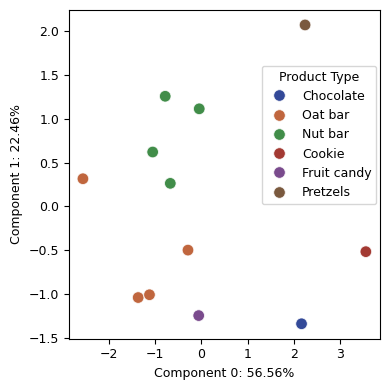

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names are in the desired format for plotting
new_column_names = []
for col in row_coordinates_df.columns:
    if isinstance(col, int):
        new_column_names.append(f'component {col}')
    else: # This would be 'Type'
        new_column_names.append(str(col))
row_coordinates_df.columns = new_column_names

# Create the scatterplot using Matplotlib and Seaborn
plt.figure(figsize=(4, 4)) # Adjusted figure size to be smaller
sns.scatterplot(
    x='component 0',
    y='component 1',
    hue='Type',
    data=row_coordinates_df.reset_index(),
    s=70, # Adjusted size of points to be smaller
    alpha=0.8 ,# transparency of points
    palette='dark' # color palette
)

#plt.title('MFA Row Coordinates (Components 0 vs 1) by Type', fontsize=9)
plt.xlabel('Component 0: 56.56%', fontsize=9)
plt.ylabel('Component 1: 22.46%', fontsize=9)
#plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Product Type', bbox_to_anchor=(.6, .85), loc='upper left', fontsize=9, title_fontsize=9)
plt.tick_params(axis='both', which='major', labelsize=9) # Adjust tick label sizes
plt.tight_layout()
plt.show()